In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/finalTrain.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [6]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [9]:
df.nunique()

ID                             45584
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather_conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

In [12]:
print("We have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 9 numerical features: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']
We have 11 categorical features: ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


In [13]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


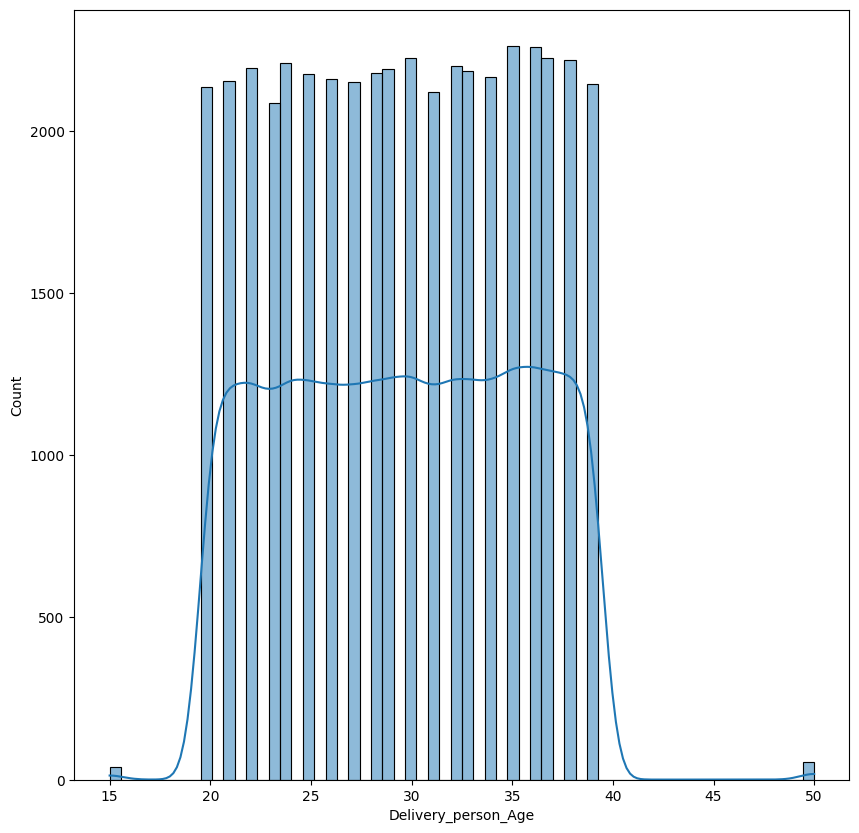

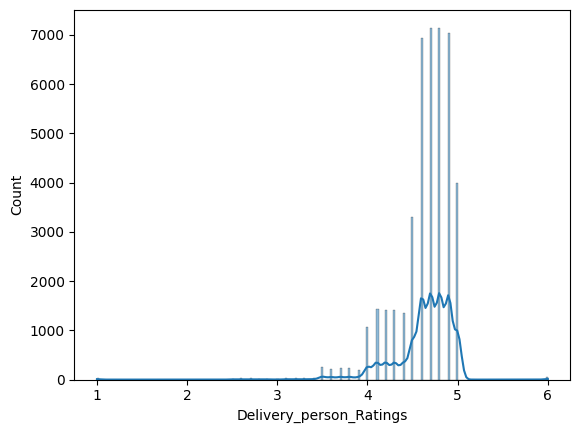

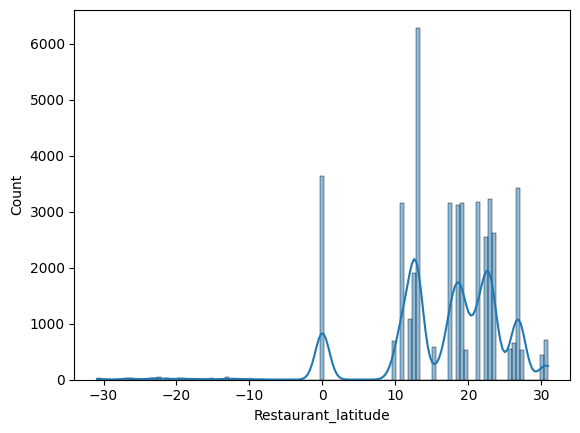

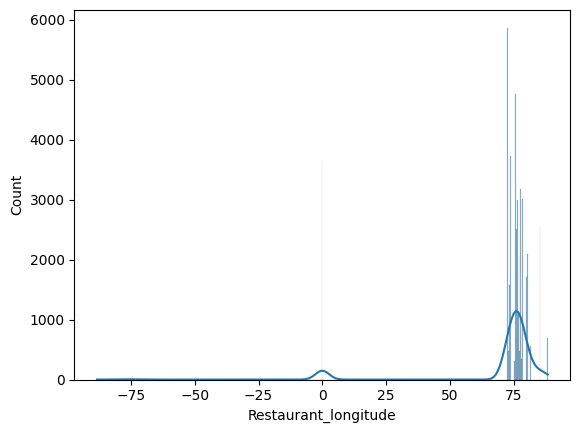

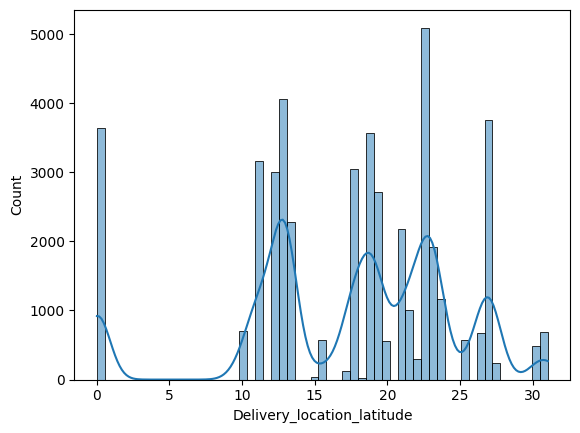

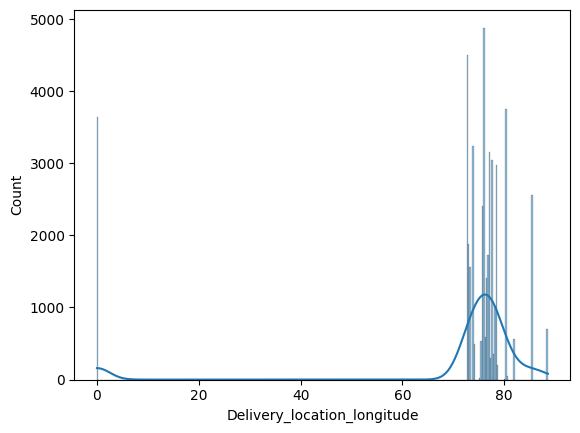

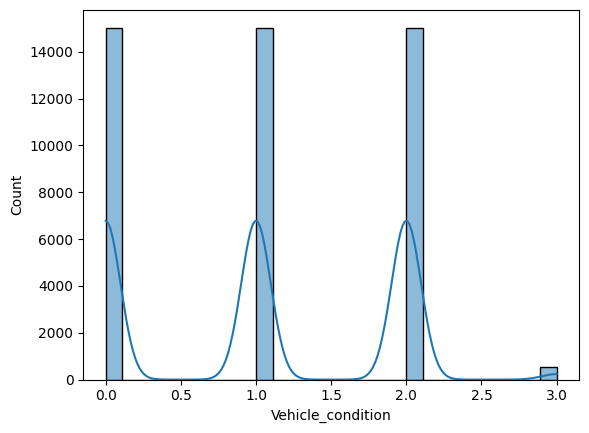

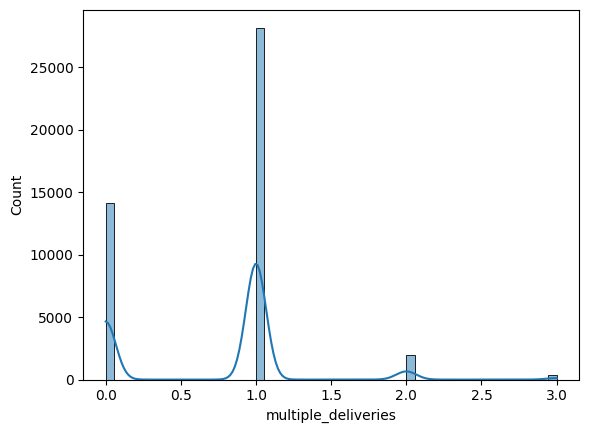

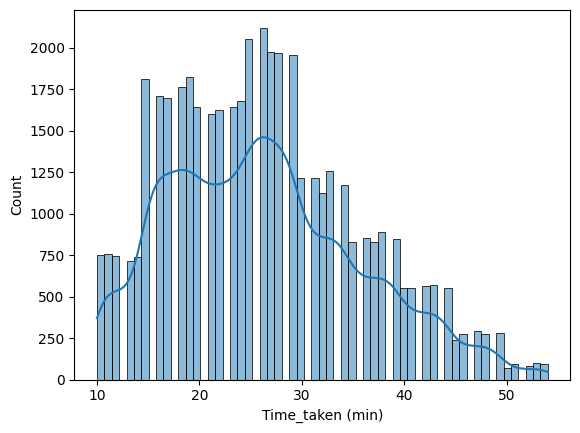

In [14]:

plt.figure(figsize=(10,10))
x=1
for i in numerical_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [15]:
categorical_features

['ID',
 'Delivery_person_ID',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [16]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [17]:
df = df.drop(labels= ["ID","Delivery_person_ID"],axis = 1)

In [18]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [19]:
categorical_features_new = [feature for feature in df.columns if df[feature].dtype == 'object']

In [20]:
categorical_features_new

['Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

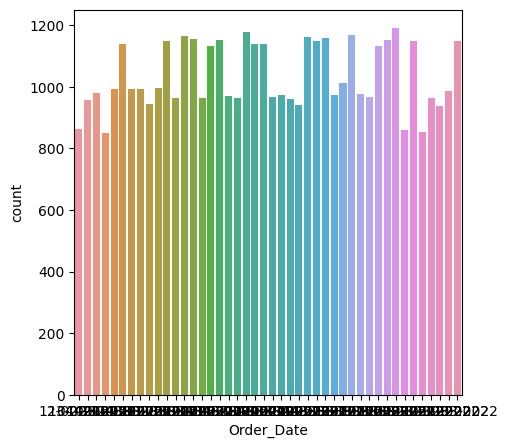

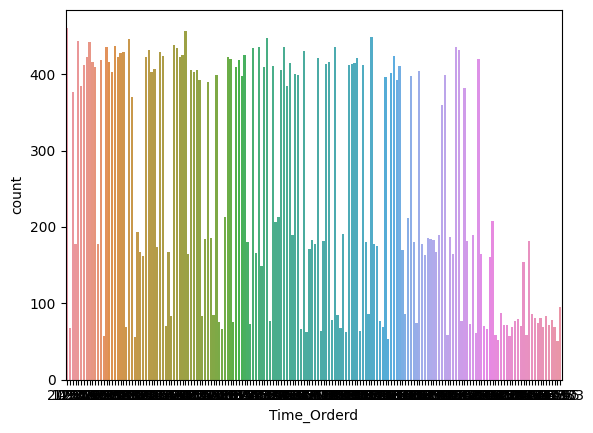

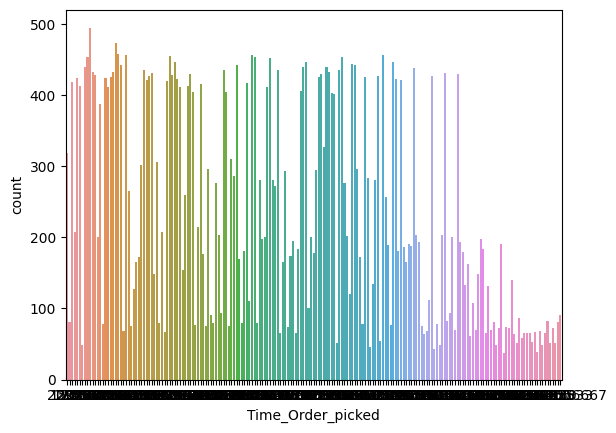

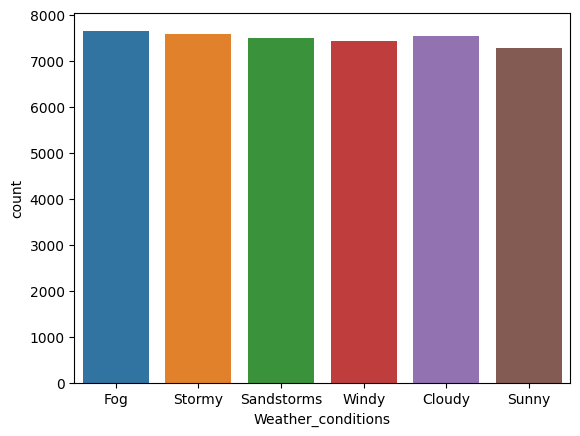

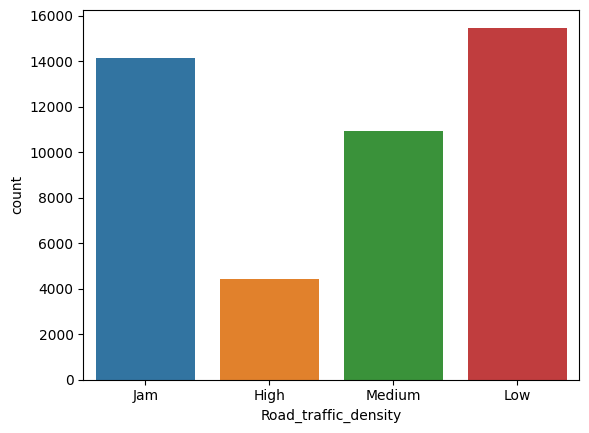

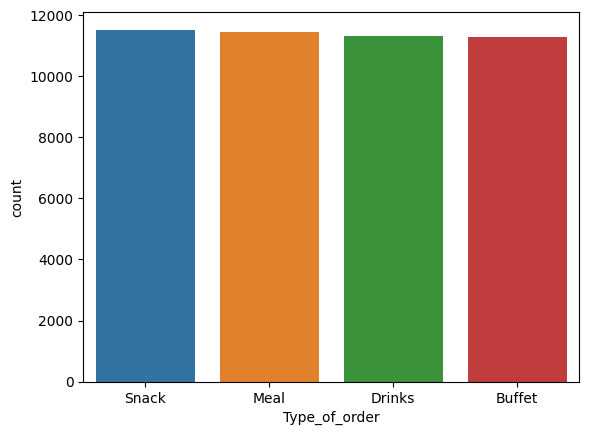

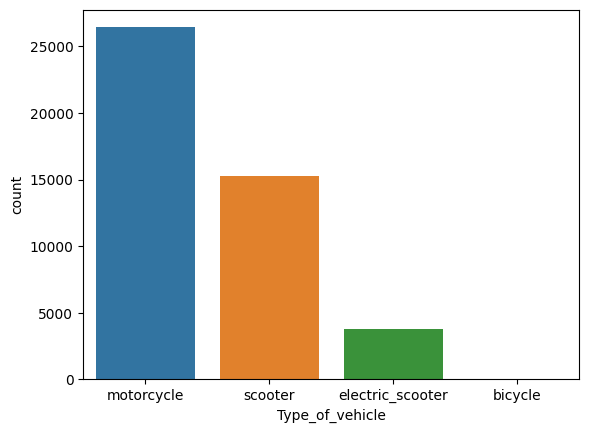

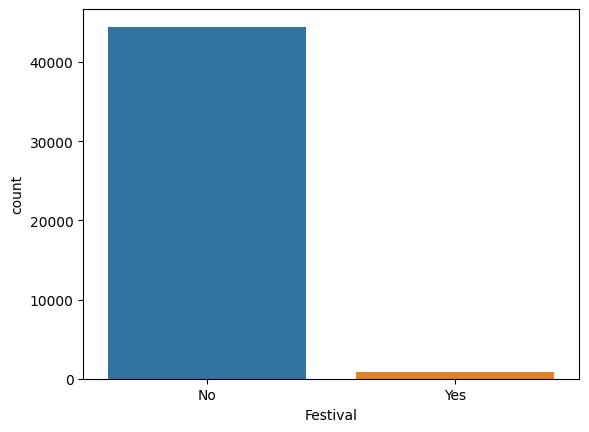

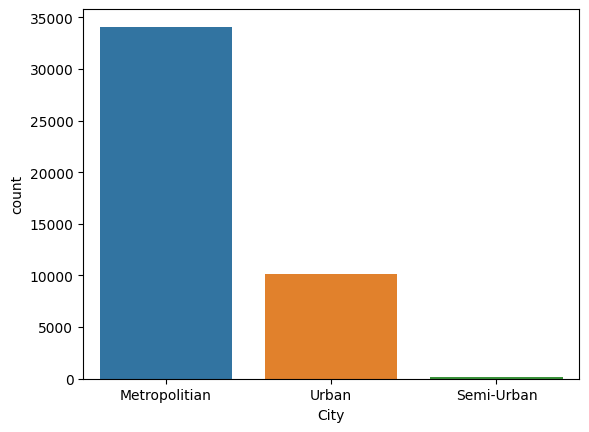

In [21]:
plt.figure(figsize=(5,5))
x=1
for i in categorical_features_new:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [22]:
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])


In [23]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [24]:
df = df.drop(labels= ["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis = 1)

In [25]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [26]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],dayfirst=True)

In [27]:
df['day']=df['Order_Date'].dt.day
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year

In [28]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year
0,36.0,4.2,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022
1,21.0,4.7,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022


In [29]:
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]
df.drop('Time_Orderd',axis=1,inplace=True)
df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]
df.drop('Time_Order_picked',axis=1,inplace=True)

In [30]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,2022-02-12,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,2022-02-13,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14,55,15,05


In [31]:
df = df.drop(labels = 'Order_Date',axis = 1)

In [32]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14,55,15,05


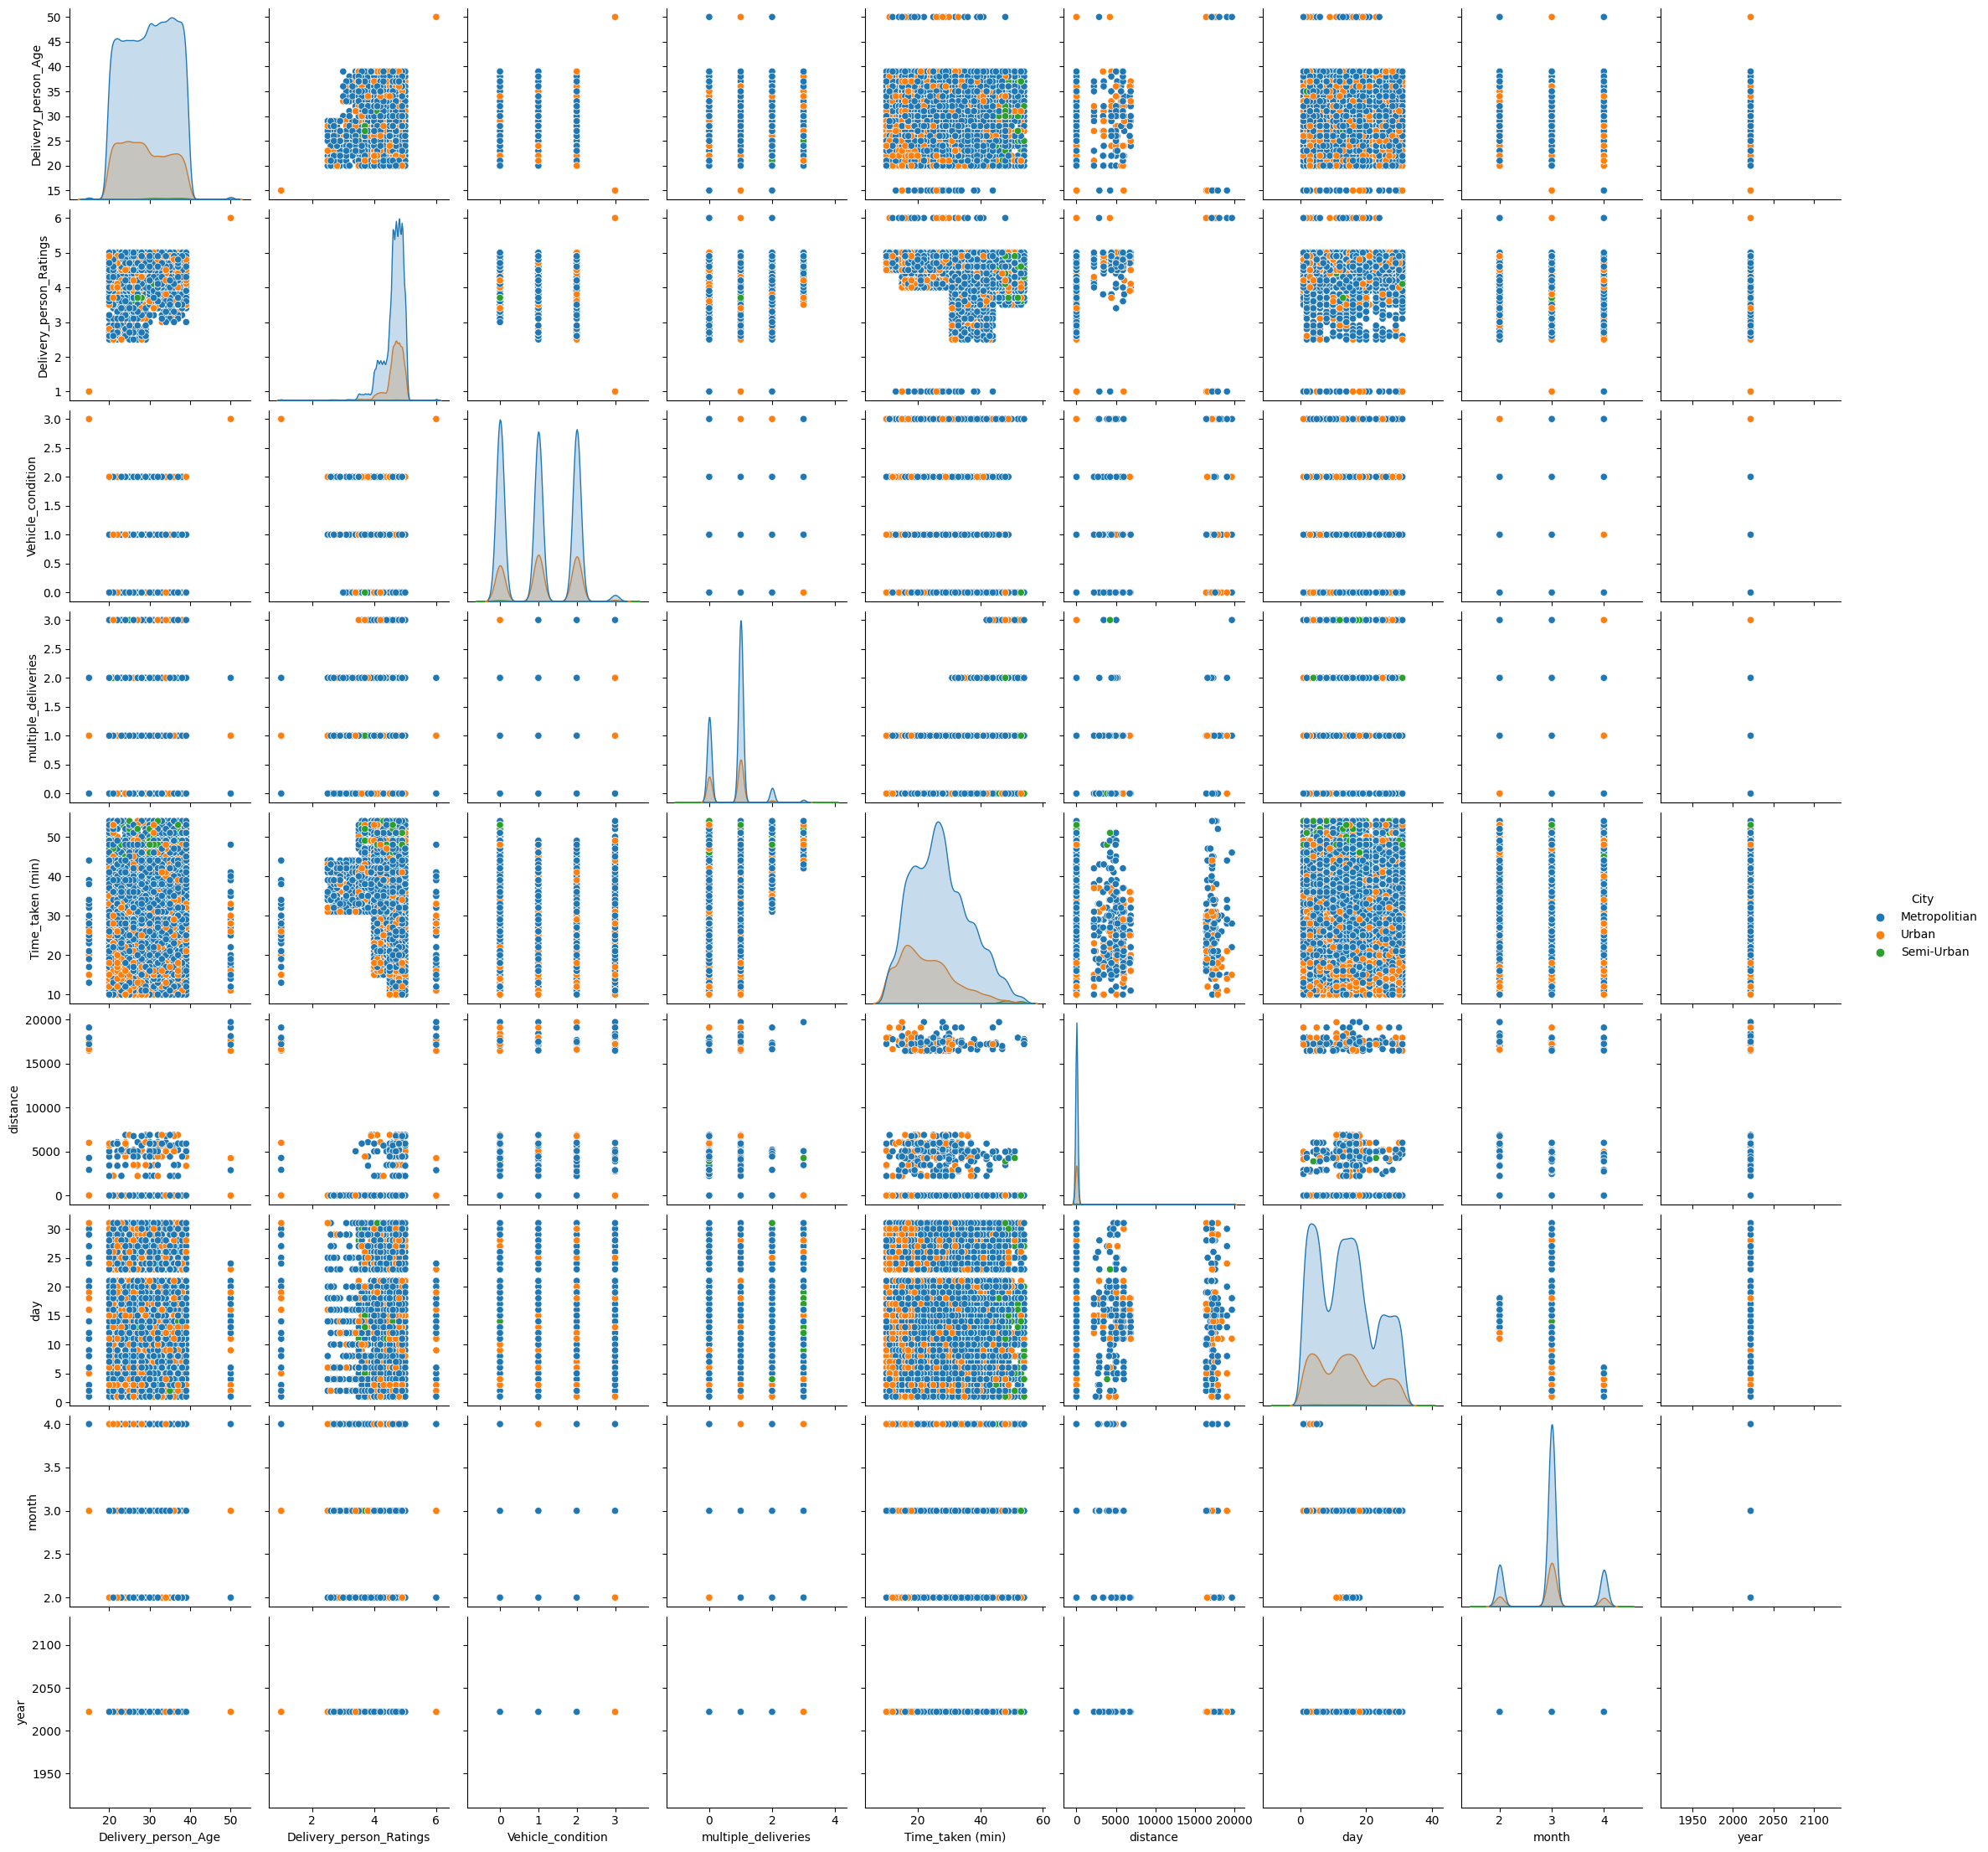

In [33]:
sns.pairplot(df,hue = 'City')
plt.show()

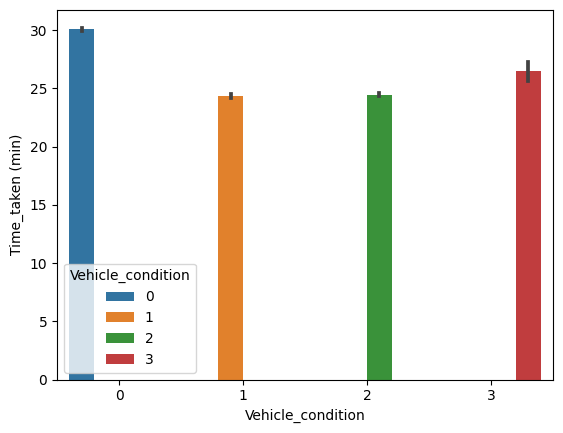

In [34]:
sns.barplot(data = df , x = 'Vehicle_condition', y = 'Time_taken (min)',hue = 'Vehicle_condition')
plt.show() 

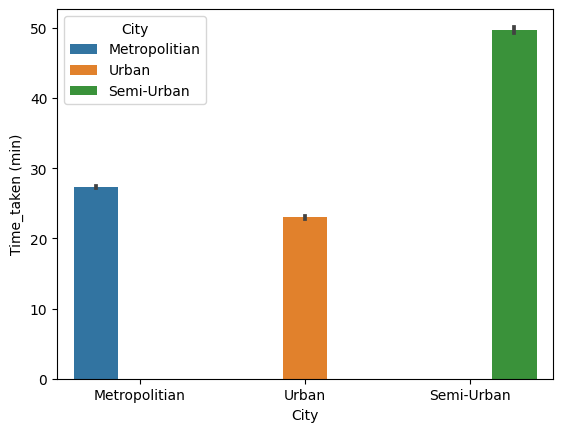

In [35]:
sns.barplot(data = df , x = 'City', y = 'Time_taken (min)',hue = 'City')
plt.show() 

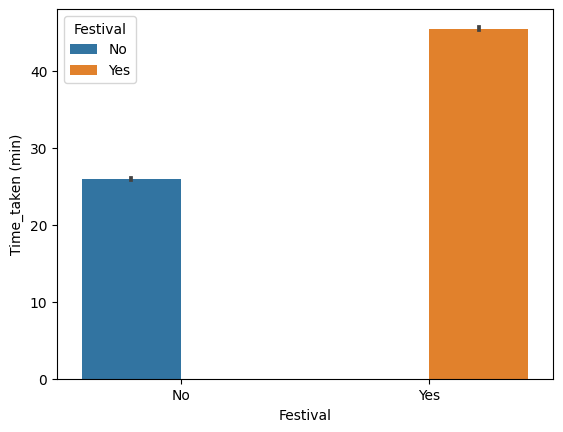

In [36]:
sns.barplot(data = df , x = 'Festival', y = 'Time_taken (min)',hue = 'Festival')
plt.show() 

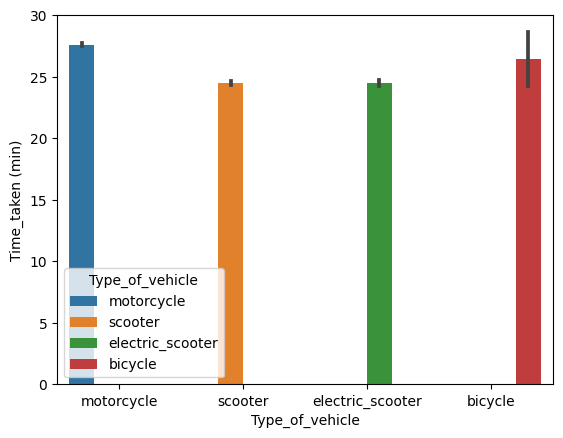

In [37]:
sns.barplot(data = df , x = 'Type_of_vehicle', y = 'Time_taken (min)',hue = 'Type_of_vehicle')
plt.show() 

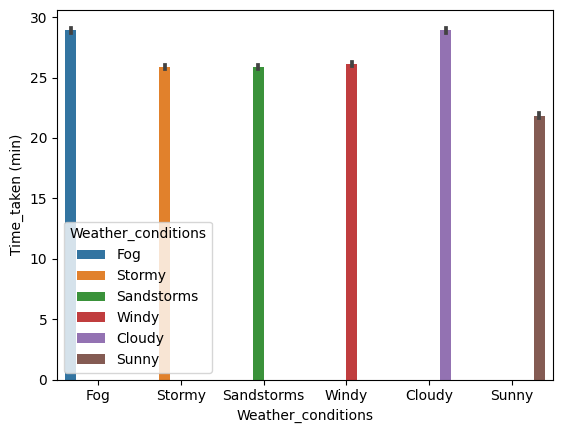

In [38]:
sns.barplot(data = df , x = 'Weather_conditions', y = 'Time_taken (min)',hue = 'Weather_conditions')
plt.show() 

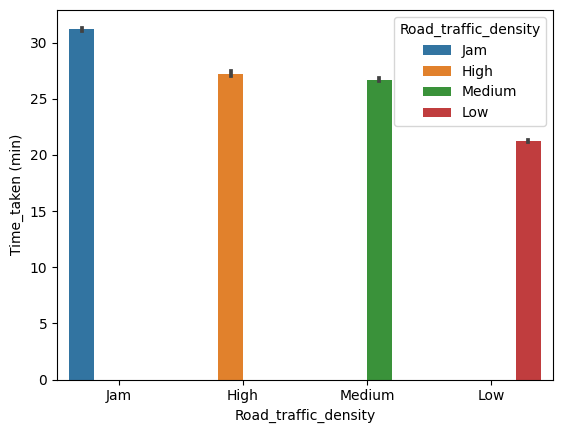

In [39]:
sns.barplot(data = df , x = 'Road_traffic_density', y = 'Time_taken (min)',hue = 'Road_traffic_density')
plt.show() 


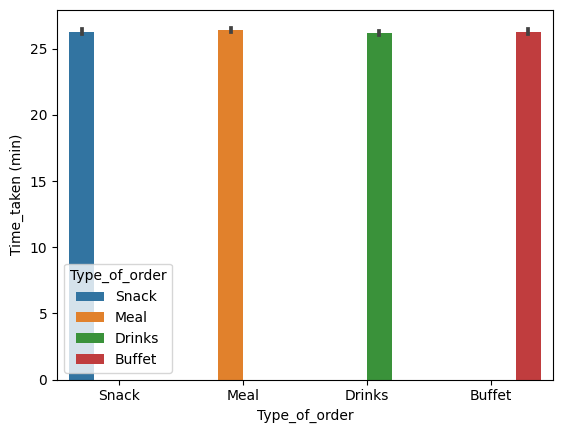

In [40]:
sns.barplot(data = df , x = 'Type_of_order', y = 'Time_taken (min)',hue = 'Type_of_order')
plt.show() 


<AxesSubplot: >

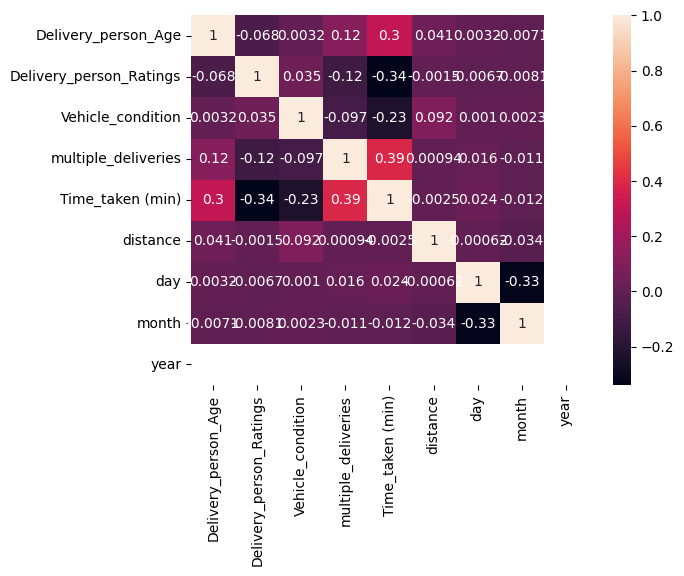

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,4,3,2022,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,2,2022,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,2,2022,19,50,20,05


In [43]:
df = df.drop(labels = "Type_of_order",axis = 1)

In [44]:
print("Categories in 'Weather_conditions' variable:",end="" )
print(df['Weather_conditions'].unique())

print("Categories in 'Road_traffic_density' variable:",end="")
print(df['Road_traffic_density'].unique())

print("Categories in'Type_of_vehicle' variable:",end="" )
print(df['Type_of_vehicle'].unique())

print("Categories in 'Festival' variable:",end="" )
print(df['Festival'].unique())

print("Categories in 'City' variable:",end="" )
print(df['City'].unique())

Categories in 'Weather_conditions' variable:['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]
Categories in 'Road_traffic_density' variable:['Jam' 'High' 'Medium' 'Low' nan]
Categories in'Type_of_vehicle' variable:['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
Categories in 'Festival' variable:['No' 'Yes' nan]
Categories in 'City' variable:['Metropolitian' 'Urban' 'Semi-Urban' nan]


In [45]:
Weather_conditions_map = {"Fog":1,"Stormy":2,"Sandstorms":3,"Windy":4,"Cloudy":5,"Sunny":6}
Road_traffic_density_map = {'Jam':1,'High':2,'Medium':3,'Low':4}
Type_of_vehicle_map = {'motorcycle':1,'scooter':2,'electric_scooter':3,'bicycle':4}
Festival_map = {'No':1,'Yes':2}
City_map = {'Metropolitian':1,'Urban':2,'Semi-Urban':3}

df["Weather_conditions"] = df["Weather_conditions"].replace(Weather_conditions_map)
df["Road_traffic_density"] = df["Road_traffic_density"].replace(Road_traffic_density_map)
df["Type_of_vehicle"] = df["Type_of_vehicle"].replace(Type_of_vehicle_map)
df["Festival"] = df["Festival"].replace(Festival_map)
df["City"] = df["City"].replace(City_map)



In [46]:
df.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,1.0,1.0,2,1,3.0,1.0,1.0,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,2.0,2.0,1,1,1.0,1.0,1.0,23,6.242319,13,2,2022,14,55,15,05
2,23.0,4.7,3.0,3.0,1,2,1.0,1.0,1.0,21,13.787860,4,3,2022,17,30,17,40
3,34.0,4.3,3.0,4.0,0,1,0.0,1.0,1.0,20,2.930258,13,2,2022,09,20,09,30
4,24.0,4.7,1.0,1.0,1,2,1.0,1.0,1.0,41,19.396618,14,2,2022,19,50,20,05


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43730 non-null  float64
 1   Delivery_person_Ratings  43676 non-null  float64
 2   Weather_conditions       44968 non-null  float64
 3   Road_traffic_density     44983 non-null  float64
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  int64  
 6   multiple_deliveries      44591 non-null  float64
 7   Festival                 45356 non-null  float64
 8   City                     44384 non-null  float64
 9   Time_taken (min)         45584 non-null  int64  
 10  distance                 45584 non-null  float64
 11  day                      45584 non-null  int64  
 12  month                    45584 non-null  int64  
 13  year                     45584 non-null  int64  
 14  Order_Hour            

In [49]:
df["Order_Hour"] = df["Order_Hour"].astype(float)
df["Order_Min"] = df["Order_Hour"].astype(float)
df["Picked_Hour"] = df["Order_Hour"].astype(float)
df["Picked_Min"] = df["Order_Hour"].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43730 non-null  float64
 1   Delivery_person_Ratings  43676 non-null  float64
 2   Weather_conditions       44968 non-null  float64
 3   Road_traffic_density     44983 non-null  float64
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  int64  
 6   multiple_deliveries      44591 non-null  float64
 7   Festival                 45356 non-null  float64
 8   City                     44384 non-null  float64
 9   Time_taken (min)         45584 non-null  int64  
 10  distance                 45584 non-null  float64
 11  day                      45584 non-null  int64  
 12  month                    45584 non-null  int64  
 13  year                     45584 non-null  int64  
 14  Order_Hour            